In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender',"Card Type"],drop_first=True)

In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [13]:
X_train.shape

(8000, 17)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [15]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=17))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


(17X3+3)+(3X1+1)=58

In [18]:
# compile we need to defined the optimization function and activation function

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=17, validation_split=0.2)

Epoch 1/17
200/200 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.7970 - val_loss: 0.4754 - val_accuracy: 0.7975
Epoch 2/17
200/200 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7970 - val_loss: 0.4184 - val_accuracy: 0.7975
Epoch 3/17
200/200 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.7970 - val_loss: 0.3651 - val_accuracy: 0.7975
Epoch 4/17
200/200 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.7970 - val_loss: 0.3160 - val_accuracy: 0.7975
Epoch 5/17
200/200 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.7973 - val_loss: 0.2705 - val_accuracy: 0.8019
Epoch 6/17
200/200 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.8203 - val_loss: 0.2296 - val_accuracy: 0.8394
Epoch 7/17
200/200 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.8831 - val_loss: 0.1943 - val_accuracy: 0.9125
Epoch 

In [21]:
model.layers[0].get_weights()
# this are 33 weight and 3 layers of first layer

[array([[ 6.56013703e-03,  2.80114114e-02,  2.03673225e-02],
        [-2.46960133e-01, -2.69935220e-01, -2.70385057e-01],
        [ 1.29333669e-02,  2.65456047e-02,  3.63549264e-03],
        [-4.43574451e-02, -8.94129053e-02, -2.61185467e-02],
        [ 1.62726659e-02,  1.54636046e-02,  2.17343271e-02],
        [ 2.40026731e-02,  2.47295648e-02,  1.26708318e-02],
        [ 1.92369923e-01,  2.15709344e-01,  1.96737379e-01],
        [-1.09767597e-02,  2.25481344e-03, -8.43046419e-03],
        [-2.12691903e+00, -1.87385786e+00, -2.11818075e+00],
        [ 3.47393602e-02,  1.03402557e-02,  3.36229689e-02],
        [ 2.57978849e-02,  3.31617706e-02,  1.50940334e-02],
        [-1.18517324e-01, -4.46466990e-02, -1.41976088e-01],
        [-3.33520472e-02,  4.53867614e-02, -4.69736941e-02],
        [ 5.40640429e-02,  1.06791794e-01,  7.03794360e-02],
        [ 2.10730024e-02,  4.76705506e-02, -2.65214276e-02],
        [ 2.57121380e-02,  6.35112077e-02, -2.61119381e-02],
        [-1.61736598e-03

In [22]:
model.layers[1].get_weights() 
# second layers

[array([[-2.8302362],
        [-2.1913588],
        [-2.5320737]], dtype=float32),
 array([1.7841213], dtype=float32)]

In [23]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [24]:
y_pred=np.where(y_log>0.05,1,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.998

In [26]:
import matplotlib.pyplot as plt 

In [27]:
history.history

{'loss': [0.5078756809234619,
  0.44656533002853394,
  0.39093029499053955,
  0.33978137373924255,
  0.2924153804779053,
  0.24924089014530182,
  0.21108266711235046,
  0.17867511510849,
  0.1518443375825882,
  0.12976840138435364,
  0.11169495433568954,
  0.09679977595806122,
  0.08447755128145218,
  0.07421034574508667,
  0.06559650599956512,
  0.05832741782069206,
  0.05213886871933937],
 'accuracy': [0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7973437309265137,
  0.8203125,
  0.8831250071525574,
  0.9493749737739563,
  0.9862499833106995,
  0.9970312714576721,
  0.9984375238418579,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142],
 'val_loss': [0.47541987895965576,
  0.41837814450263977,
  0.36505308747291565,
  0.3159516453742981,
  0.27049270272254944,
  0.22958984971046448,
  0.19431647658348083,
  0.16490602493286133,
  0.14031782746315002,
  0.120290

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'loss': [0.5078756809234619,
  0.44656533002853394,
  0.39093029499053955,
  0.33978137373924255,
  0.2924153804779053,
  0.24924089014530182,
  0.21108266711235046,
  0.17867511510849,
  0.1518443375825882,
  0.12976840138435364,
  0.11169495433568954,
  0.09679977595806122,
  0.08447755128145218,
  0.07421034574508667,
  0.06559650599956512,
  0.05832741782069206,
  0.05213886871933937],
 'accuracy': [0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7970312237739563,
  0.7973437309265137,
  0.8203125,
  0.8831250071525574,
  0.9493749737739563,
  0.9862499833106995,
  0.9970312714576721,
  0.9984375238418579,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142,
  0.9985937476158142],
 'val_loss': [0.47541987895965576,
  0.41837814450263977,
  0.36505308747291565,
  0.3159516453742981,
  0.27049270272254944,
  0.22958984971046448,
  0.19431647658348083,
  0.16490602493286133,
  0.14031782746315002,
  0.120290

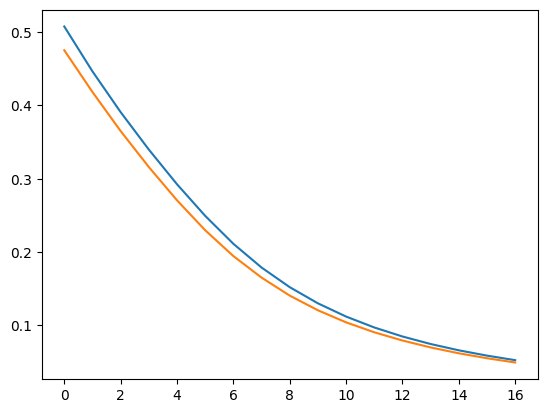

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

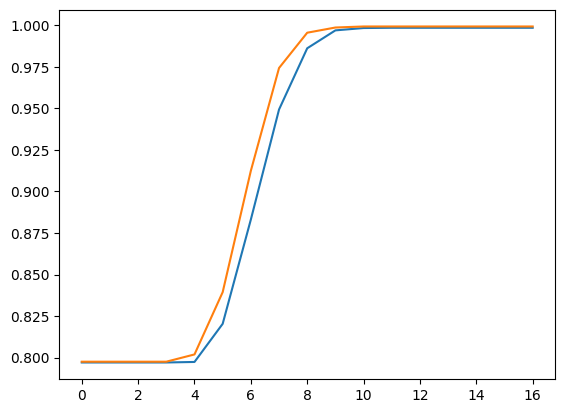

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])